In [2]:
from BloomFilter import BloomFilter
from random import shuffle
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
n = 2**20 #size of the array
h = 6 #num of hash_f
  
bloomf = BloomFilter(n,h)

In [4]:
# words to be added
word_present = ['abound','abounds','abundance','abundant','accessible',
                'bloom','blossom','bolster','bonny','bonus','bonuses',
                'coherent','cohesive','colorful','comely','comfort',
                'gems','generosity','generous','generously','genial']
  
# word not added
word_absent = ['bluff','cheater','hate','war','humanity',
               'racism','hurt','nuke','gloomy','facebook',
               'geeksforgeeks','twitter']

In [5]:
len(word_present)

21

In [6]:
for item in word_present:
    bloomf.insert_str(item)
  
shuffle(word_present)
shuffle(word_absent)

In [7]:
test_words = word_present[:10] + word_absent

In [8]:
shuffle(test_words)

In [9]:
for word in test_words:
    if bloomf.testmembership_str(word):
        if word in word_absent:
            print("'{}' is a false positive!".format(word))
        else:
            print("'{}' is probably present!".format(word))
    else:
        print("'{}' is definitely not present!".format(word))

'facebook' is definitely not present!
'cheater' is definitely not present!
'abound' is probably present!
'gloomy' is definitely not present!
'geeksforgeeks' is definitely not present!
'gems' is probably present!
'accessible' is probably present!
'bloom' is probably present!
'hurt' is definitely not present!
'twitter' is definitely not present!
'comfort' is probably present!
'war' is definitely not present!
'blossom' is probably present!
'racism' is definitely not present!
'bluff' is definitely not present!
'humanity' is definitely not present!
'bolster' is probably present!
'coherent' is probably present!
'hate' is definitely not present!
'comely' is probably present!
'nuke' is definitely not present!
'colorful' is probably present!


In [10]:
bloomfilter_size = [2**4,2**8,2**12,2**16,2**20]
num_hash = [2,4,6,8]
num_of_str = [100,250,500,750,1000,2500,5000,7500,10000,25000]

In [11]:
bloomfilter_list_1 = []
for num in num_hash:
    bloomfilter_list_1.append(BloomFilter(bloomfilter_size[0],num))
bloomfilter_list_2 = []
for num in num_hash:
    bloomfilter_list_2.append(BloomFilter(bloomfilter_size[1],num))
bloomfilter_list_3 = []
for num in num_hash:
    bloomfilter_list_3.append(BloomFilter(bloomfilter_size[2],num))
bloomfilter_list_4 = []
for num in num_hash:
    bloomfilter_list_4.append(BloomFilter(bloomfilter_size[3],num))
bloomfilter_list_5 = []
for num in num_hash:
    bloomfilter_list_5.append(BloomFilter(bloomfilter_size[4],num))

In [12]:
data = pd.read_csv("wlist_match11.txt")
print(data.shape)
print(data.head)
word_list_1 = data.values.tolist()
word_list = [ item for elem in word_list_1 for item in elem]


(42895, 1)
<bound method NDFrame.head of               a
0           a's
1            aa
2           aaa
3          aahs
4           aal
...         ...
42890     zorro
42891  zucchini
42892      zulu
42893    zurich
42894    zydeco

[42895 rows x 1 columns]>


In [13]:
#Shuffle with seed number 1
random.Random(1).shuffle(word_list)

In [14]:
#Create a list of word presented
#25000 words in total
present_list = []
for i in range(25000):
    present_list.append(word_list[i])

In [15]:
#Create a list of words not presented
#Each with length 15000 for stability of FP rate
unpresent_list = []
for i in range(15000):
    unpresent_list.append(word_list[25000+i])

len(unpresent_list)


15000

In [16]:
#Check for failed word
for i in range(25000):
    if(isinstance(present_list[i], float) == True):
        print(i)
        break


24954


In [17]:
unpresent_list[8446] = "dsadsa"
present_list[24954] = "asdasd"

In [18]:
fp_rates_list_1 = []

for k in range(len(bloomfilter_list_1)):

    temp = []

    for n in range(len(num_of_str)):

        for i in range(num_of_str[n]):

            bloomfilter_list_1[k].insert_str(present_list[i])

        fp = 0

        for j in range(len(unpresent_list)):

            if((bloomfilter_list_1[k].testmembership_str(unpresent_list[j])) == True):
                
                fp = fp + 1

        fp_rate = fp/len(unpresent_list)

        temp.append(fp_rate)

    fp_rates_list_1.append(temp)
        

In [19]:
fp_rates_list_2 = []

for k in range(len(bloomfilter_list_2)):

    temp = []

    for n in range(len(num_of_str)):

        for i in range(num_of_str[n]):

            bloomfilter_list_2[k].insert_str(present_list[i])

        fp = 0

        for j in range(len(unpresent_list)):

            if((bloomfilter_list_2[k].testmembership_str(unpresent_list[j])) == True):
                
                fp = fp + 1

        fp_rate = fp/len(unpresent_list)

        temp.append(fp_rate)

    fp_rates_list_2.append(temp)
        

In [20]:
fp_rates_list_3 = []

for k in range(len(bloomfilter_list_3)):

    temp = []

    for n in range(len(num_of_str)):

        for i in range(num_of_str[n]):

            bloomfilter_list_3[k].insert_str(present_list[i])

        fp = 0

        for j in range(len(unpresent_list)):

            if((bloomfilter_list_3[k].testmembership_str(unpresent_list[j])) == True):
                
                fp = fp + 1

        fp_rate = fp/len(unpresent_list)

        temp.append(fp_rate)

    fp_rates_list_3.append(temp)
        

In [21]:
fp_rates_list_4 = []

for k in range(len(bloomfilter_list_4)):

    temp = []

    for n in range(len(num_of_str)):

        for i in range(num_of_str[n]):

            bloomfilter_list_4[k].insert_str(present_list[i])

        fp = 0

        for j in range(len(unpresent_list)):

            if((bloomfilter_list_4[k].testmembership_str(unpresent_list[j])) == True):
                
                fp = fp + 1

        fp_rate = fp/len(unpresent_list)

        temp.append(fp_rate)

    fp_rates_list_4.append(temp)
        

In [22]:
fp_rates_list_5 = []

for k in range(len(bloomfilter_list_5)):

    temp = []

    for n in range(len(num_of_str)):

        for i in range(num_of_str[n]):

            bloomfilter_list_5[k].insert_str(present_list[i])

        fp = 0

        for j in range(len(unpresent_list)):

            if((bloomfilter_list_5[k].testmembership_str(unpresent_list[j])) == True):
                
                fp = fp + 1

        fp_rate = fp/len(unpresent_list)

        temp.append(fp_rate)

    fp_rates_list_5.append(temp)
        

In [23]:
fp_rates_list_5

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.666666666666667e-05,
  0.0002,
  0.0004,
  0.002533333333333333],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

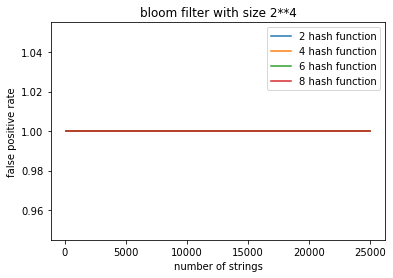

In [24]:
# line 1 points
x1 = num_of_str
y1 = fp_rates_list_1[0]
# plotting the line 1 points
plt.plot(x1, y1, label = "2 hash function")

# line 2 points
x2 = num_of_str
y2 = fp_rates_list_1[1]
# plotting the line 2 points
plt.plot(x2, y2, label = "4 hash function")

# line 3 points
x2 = num_of_str
y2 = fp_rates_list_1[2]
# plotting the line 2 points
plt.plot(x2, y2, label = "6 hash function")

# line 4 points
x2 = num_of_str
y2 = fp_rates_list_1[3]
# plotting the line 2 points
plt.plot(x2, y2, label = "8 hash function")


# naming the x axis
plt.xlabel('number of strings')
# naming the y axis
plt.ylabel('false positive rate')
# giving a title to my graph
plt.title('bloom filter with size 2**4')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()


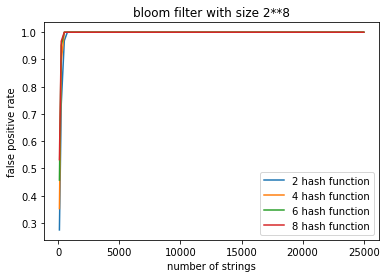

In [25]:
# line 1 points
x1 = num_of_str
y1 = fp_rates_list_2[0]
# plotting the line 1 points
plt.plot(x1, y1, label = "2 hash function")

# line 2 points
x2 = num_of_str
y2 = fp_rates_list_2[1]
# plotting the line 2 points
plt.plot(x2, y2, label = "4 hash function")

# line 3 points
x2 = num_of_str
y2 = fp_rates_list_2[2]
# plotting the line 2 points
plt.plot(x2, y2, label = "6 hash function")

# line 4 points
x2 = num_of_str
y2 = fp_rates_list_2[3]
# plotting the line 2 points
plt.plot(x2, y2, label = "8 hash function")


# naming the x axis
plt.xlabel('number of strings')
# naming the y axis
plt.ylabel('false positive rate')
# giving a title to my graph
plt.title('bloom filter with size 2**8')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()


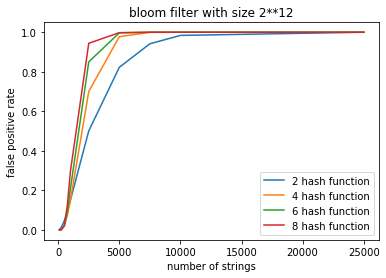

In [26]:
# line 1 points
x1 = num_of_str
y1 = fp_rates_list_3[0]
# plotting the line 1 points
plt.plot(x1, y1, label = "2 hash function")

# line 2 points
x2 = num_of_str
y2 = fp_rates_list_3[1]
# plotting the line 2 points
plt.plot(x2, y2, label = "4 hash function")

# line 3 points
x2 = num_of_str
y2 = fp_rates_list_3[2]
# plotting the line 2 points
plt.plot(x2, y2, label = "6 hash function")

# line 4 points
x2 = num_of_str
y2 = fp_rates_list_3[3]
# plotting the line 2 points
plt.plot(x2, y2, label = "8 hash function")


# naming the x axis
plt.xlabel('number of strings')
# naming the y axis
plt.ylabel('false positive rate')
# giving a title to my graph
plt.title('bloom filter with size 2**12')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()


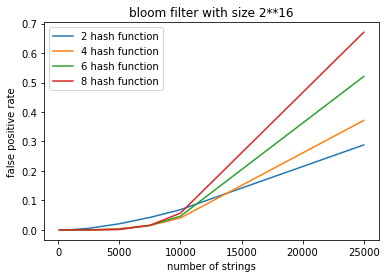

In [27]:
# line 1 points
x1 = num_of_str
y1 = fp_rates_list_4[0]
# plotting the line 1 points
plt.plot(x1, y1, label = "2 hash function")

# line 2 points
x2 = num_of_str
y2 = fp_rates_list_4[1]
# plotting the line 2 points
plt.plot(x2, y2, label = "4 hash function")

# line 3 points
x2 = num_of_str
y2 = fp_rates_list_4[2]
# plotting the line 2 points
plt.plot(x2, y2, label = "6 hash function")

# line 4 points
x2 = num_of_str
y2 = fp_rates_list_4[3]
# plotting the line 2 points
plt.plot(x2, y2, label = "8 hash function")


# naming the x axis
plt.xlabel('number of strings')
# naming the y axis
plt.ylabel('false positive rate')
# giving a title to my graph
plt.title('bloom filter with size 2**16')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()


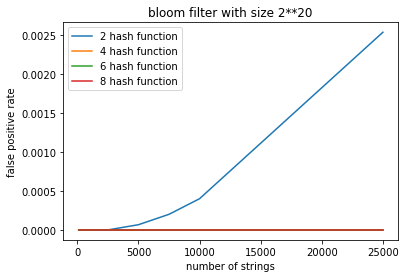

In [28]:
# line 1 points
x1 = num_of_str
y1 = fp_rates_list_5[0]
# plotting the line 1 points
plt.plot(x1, y1, label = "2 hash function")

# line 2 points
x2 = num_of_str
y2 = fp_rates_list_5[1]
# plotting the line 2 points
plt.plot(x2, y2, label = "4 hash function")

# line 3 points
x2 = num_of_str
y2 = fp_rates_list_5[2]
# plotting the line 2 points
plt.plot(x2, y2, label = "6 hash function")

# line 4 points
x2 = num_of_str
y2 = fp_rates_list_5[3]
# plotting the line 2 points
plt.plot(x2, y2, label = "8 hash function")


# naming the x axis
plt.xlabel('number of strings')
# naming the y axis
plt.ylabel('false positive rate')
# giving a title to my graph
plt.title('bloom filter with size 2**20')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()
